#   Projet développement logiciel

##  Partie Python

###  TP°1

#### Luana Timofte et Anas El Benna

##  Exercice 1 - Le jeu de la vie

<img src="https://raw.githubusercontent.com/Elpysum/Projet-Dev-Log/master/Images/F1.jpg" width="500">

<p style='text-align: justify;'> Le jeu de la vie est un automate cellulaire mis au point par le mathématicien britannique John Horton Conway en 1970. Il constitue l'exemple le plus connu d'un automate cellulaire. Le "jeu" est en fait un jeu à zéro joueur, ce qui signifie que son évolution est déterminée par son état initial et ne nécessite aucune intervention de la part d'un humain. On interagit avec le jeu de la vie en créant une configuration initiale. Il ne reste plus alors qu'à observer son évolution. </p>

<p style='text-align: justify;'> L'univers du jeu est une grille orthogonale bidimensionnelle infinie de cellules carrées (dans la suite du projet on supposera que la grille est carrée et de taille finie pour éviter toute difficulté ; on supposera aussi que le contour de la grille est toujours inactif/mort), chacune d'entre elles se trouvant dans l'un des deux états possibles : </p>

* **vivant**

* **mort**

Chaque cellule interagit avec ses huit voisins, qui sont les cellules directement adjacentes horizontalement, verticalement ou en diagonale, comme indiqué sur la Figure 1. À chaque étape, les transitions suivantes se produisent :

**a)** Toute cellule morte ayant exactement 3 voisins vivants devient une cellule vivante (naissance), cf. **Figure 2a**

**b)** Toute cellule vivante avec 2 ou 3 voisins vivants vit inchangée jusqu'à la génération suivante (équilibre), cf. **Figure 2b**

**c)** Toute cellule vivante ayant 4 voisins vivants (mort par étouffement), cf. **Figure 2c**

**d)** Toute cellule vivante ayant 0 ou 1 voisin vivant décède (mort par isolement), cf. **Figure 2d**.

Voici donc la **Figure 2a**, représentant les quatre configurations possibles pour la cellule centrale : naissance (bleu), équilibre, mort par étouffement et par isolement (rouge) :

<img src="https://raw.githubusercontent.com/Elpysum/Projet-Dev-Log/master/Images/F2.jpg" width="700">

<p style='text-align: justify;'> Le modèle initial constitue la "graine" du système. La première génération est crée en appliquant les règles ci-dessus simultanément à chaque cellule de la graine - les naissances et les décès se produisent simultanément. Ainsi chaque génération est une fonction de la précèdente. Les règles continuent d'être appliquées de manière répétée pour créer d'autres générations. </p>

**ATTENTION :** La "carte" (on utilisera une liste de liste pour la représenter) est équipée d'une frontière de 0 : cela permet d'accélérer légèrement les calculs en évitant d'avoir des tests spécifiques pour les frontières lors du comptage du nombre de voisins. Ainsi la "couronne" du tour de la carte sera fixée à zéro. </p>

### Implémentation sans numpy


Toutes les fonctions définies, par la suite, sont placées dans un fichier **utils.py** que l'on appellera depuis le notebook.
De même, pour avoir la description de chaque fonction, nous allons utiliser **help**.

On va fournir ci-dessous le code Python pour coder ce jeu. Dans la suite on va coder les cellules vivantes par des 1 et les cellules mortes par des 0.   

Tout d'abord on définit la fonction **calcul_nb_voisins**, comme ceci :

In [29]:
from utils import calcul_nb_voisins
help(calcul_nb_voisins)

Help on function calcul_nb_voisins in module utils:

calcul_nb_voisins(Z)
    Arguments : 
    - Z = une liste de listes
    
    La fonction calcule le nombre de cellules voisines vivantes de chaque autre cellule.



#### Question 1 
Appliquons la fonction précédente à la liste (de liste) Z suivante :

In [30]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

Expliquons ce que représente la sortie obtenue **N=calcul_nb_voisins(Z)** :

Cette sortie représente le nombre de cellules voisines vivantes de chaque autre cellule (ici, ce premier Z c'est la première itération).

In [31]:
N = calcul_nb_voisins(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

Cette sortie donne une liste de listes N de même taille que Z, tel que $N_{ij}$ est le nombre de voisins vivants parmi les 8 voisins de la cellule $Z_{ij}$.  

$\textit{Exemple :}$ La cellule $Z_{34}$ a comme voisins vivants les cellulles $Z_{24}, Z_{43}$ et $Z_{44}$

Maintenant, on définit une fonction **iteration_jeu** (dans le fichier utils.py), puis on l'applique sur Z.

In [32]:
from utils import iteration_jeu
help(iteration_jeu)

Help on function iteration_jeu in module utils:

iteration_jeu(Z)
    Arguments : 
    - Z = une liste de listes
    
    Propriétés : 
    - On parcourt avec la boucle for chaque cellule de Z avec son nombre de voisins vivants.
    - Si une cellule vivante a 0, 1 ou 4 voisins vivants on lui affecte la valeur 0 (mort).
    - Si une cellule morte a exactement 3 voisins vivants on lui affecte 1 (naissance).
    - Tout autre cas garde la meme valeur.
    
    Cette fonction fait donc une simulation d'un tour du jeu pour une liste Z donnée.



In [33]:
iteration_jeu(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

#### Question 2
Dans cette question on se propose pour la liste Z, ci-dessus d'afficher les étapes du jeu de 0 à 9 itérations, en utilisant une boucle **for**. On utilisera la fonction **subplot** de **matplotlib** pour afficher sur 2 lignes et 5 colonnes, ces 10 matrices. De plus, on a transformé ces listes en **array** pour pouvoir utiliser la fonction **imshow** de matplotlib.

Pour cela, on définit une fonction **iterations_09**.

In [34]:
import matplotlib.pyplot as plt
from utils import iterations_09
help(iterations_09)

Help on function iterations_09 in module utils:

iterations_09(Z)
    Arguments : 
    - Z = une liste de listes (carrée)
    
    Cette fonction affiche une simulation de 0 à 9 itérations pour un Z de n'importe quelle taille, sur 2 lignes et 5 colonnes.



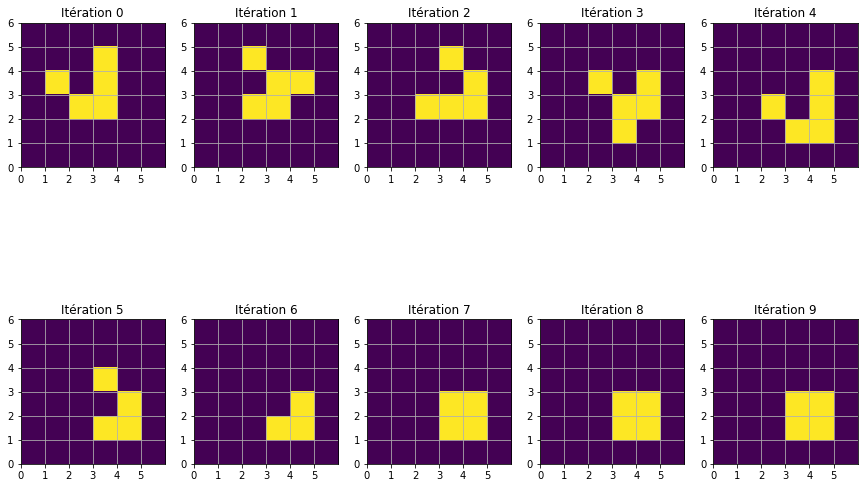

In [35]:
Z = ([[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]])

iterations_09(Z)

#### Question 3
Premièrement, nous observons que l'itération 0 a la même forme que la 4ème itération. Ensuite, nous remarquons qu'entre l'itération 0  et l'itération 4, les cellules convergent vers le côté droit, en bas du graphique, là où l'on trouve la forme de l'itération initiale. 

Après l'itération 7, ces cellules trouvent une stabilité, donc ne bougent plus, elles restent dans le côté droit et bas du graphique. En effet, chacune des 4 cellules vivantes restantes a 3 voisins vivants, donc elles vivent inchangées (équilibre).  (**cf. Figure 2b**)

### Implémentation avec *numba*

#### Question 4

On reprend la section précédente avec les fonctions **calcul_nb_voisins_rapide** et **iteration_jeu_rapide** utilisant *numba* et la compilation **"jit"** qui sont dans le fichier **utils.py**. On propose un protocole expérimental pour comparer les temps de calcul avec ou sans cet apport.

In [36]:
import numpy as np
import time
from numba import jit

In [37]:
Z_np = np.array([[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]])

In [38]:
from utils import calcul_nb_voisins_rapide
help(calcul_nb_voisins_rapide)


# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
calcul_nb_voisins_rapide(Z_np)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.time()
calcul_nb_voisins_rapide(Z_np)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))


Help on CPUDispatcher in module utils:

calcul_nb_voisins_rapide(Z)
    Arguments : 
    - Z = une liste de listes
    
    La fonction calcule le nombre de cellules voisines vivantes de chaque autre cellule, mais d'une façon plus rapide.

Elapsed (with compilation) = 0.0
Elapsed (after compilation) = 0.0


On observe que, après une première compilation, le temps de compilation est beaucoup plus rapide (converge vers 0) ! 

In [39]:
# Cela peut prendre un peu de temps 
%timeit calcul_nb_voisins(Z)

13.9 µs ± 833 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
# Cela peut prendre un peu de temps 
%timeit calcul_nb_voisins_rapide(Z_np)

3.29 µs ± 142 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
from utils import iteration_jeu_rapide
help(iteration_jeu_rapide)


# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
iteration_jeu_rapide(Z_np)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.time()
iteration_jeu_rapide(Z_np)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Help on CPUDispatcher in module utils:

iteration_jeu_rapide(Z)
    Arguments : 
    - Z = une liste de listes
    
    Cette fonction fait donc une simulation d'un tour du jeu pour une liste Z donnée, d'une manière plus rapide.

Elapsed (with compilation) = 0.0
Elapsed (after compilation) = 0.0


Encore une fois, le temps de compilation après une première compilation est incroyablement rapide !

In [42]:
# Cela peut prendre un peu de temps 
%timeit iteration_jeu(Z)

18.7 µs ± 833 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [43]:
# Cela peut prendre un peu de temps 
%timeit iteration_jeu_rapide(Z_np)

2.92 µs ± 47.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Finalement, on observe d'après ces temps de compilations, que les versions avec *Numba* et la compilation *jit* sont largement plus rapides en compilation.

#### Question 5

Par la suite, on crée un *widget* dont le curseur permet de contrôler les itérations (par exemple de 0 à 30) du jeu de la vie, quand on initialise avec la **matrice Z_huge** suivante : 

In [44]:
Z_huge = np.zeros((30,30))

Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])

Z_huge[10:16, 10:16] = Z_np

Pour une meilleure visualisation, nous avons choisi de diminuer la taille de la matrice à **(30,30)**.

En premier, prenons un exemple avec la liste des listes Z. Ensuite, nous allons faire le widget avec **Z_huge**, de taille (30,30).

Help on function step_i in module utils:

step_i(Z_initial, iter)
    Arguments : 
    - Z_initial = une liste de listes initiale
    - iter = nombre d'iterations 
    
    Cette fonction affiche l'étape i (choisie par l'utilisateur) du jeu de la vie, pour une matrice Z.



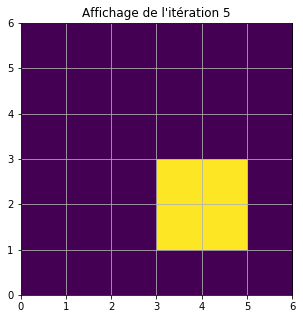

In [45]:
from utils import step_i
help(step_i)
step_i(Z,5)  # Z à l'itération 5 

#### Création de widget 

In [46]:
import ipywidgets as pw

pw.interact(step_i, Z_initial = pw.fixed(Z_huge) , iter = (0, 100, 1))

interactive(children=(IntSlider(value=50, description='iter'), Output()), _dom_classes=('widget-interact',))

<function utils.step_i(Z_initial, iter)>

En bougeant le curseur du *widget* entre 0 et 100, on observe qu'à partir de **l'itération 63**, les cellules trouvent une **stabilité**.

##  Exercice 2 - Régression linéaire

#### Question 1
On va s'intéresser, dans la suite, à la base de données **MNIST** qui représente des chiffres numérisés, dont on connaît une "étiquette" associée parmi les chiffres **(0, 1, . . . , 9)**.

On charge la base de données **MNIST** avec la commande from **sklearn.datasets** import **fetch_mldata** (ou bien avec from sklearn.datasets import fetch_openml si la version de sklearn est plus récente).

In [47]:
from sklearn.datasets import fetch_mldata
from random import randint
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets import fetch_openml 

In [48]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')  # Matrice de vecteurs d'incidence codant les images.
y = mnist.target  # liste des labels des images.

C:\Users\Luana Paully\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Luana Paully\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


#### Question 2
On transforme X et y pour ne garder que les cas des chiffres 3 et 7.
On visualise avec **imshow** un exemple de chaque classe d'image (un X donc), en utilisant un reshape adapté.

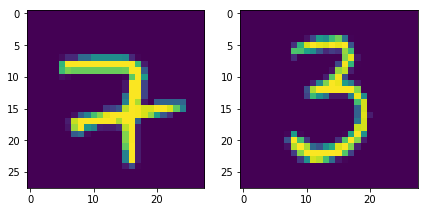

In [49]:
# Construisons les objets X_37 et y_37, des classes de X contenant des 3 et des 7.

cluster_3 = np.array(y==3)
cluster_7 = np.array(y==7)

X_37 = X[cluster_3 + cluster_7]
y_37 = y[cluster_3 + cluster_7]


# Affichage de deux exemples représentatifs de chaque classe. 

plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.imshow((X[cluster_7][2]).reshape(28,28))

plt.subplot(1,2,2)
plt.imshow((X[cluster_3][7]).reshape(28,28))

#### Question 3

<p style='text-align: justify;'> On utilise la fonction LogisticRegression pour apprendre un modèle de classiffication sur l'intégralité des données (on choisira un cas sans ordonnée à l'origine, (avec l'option fit_intercept=False). Le modèle prédit alors la classe d'une image en considérant une image comme un vecteur x et en choisissant l'une des deux classes selon le signe de $w^Tx$, où w est le vecteur appris par la méthode et stocké dans l'attribut .coef_. </p>

In [51]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(fit_intercept=False)
logreg.fit(X_37, y_37)

C:\Users\Luana Paully\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
w = logreg.coef_

#### Question 4
En utilisant le vecteur w de cette manière, proposer un widget qui investigue l'impact de la transformation de l'image par l'opération :  $$x_{mod} = x - \alpha \frac{w^Tx}{||w||^2}$$

On prendra pour x l'image associé au chiffre 7 de la question précédente, et le widget fera varier $\alpha$ de 0.1 à 100 de 0.1 en 0.1. Pour cela on définira une fonction **fig_digit** (à ajouter de nouveau dans le fichier **utils.py**), qui contient une **docstring** décrivant son fonctionnement.

In [53]:
from utils import fig_digit
help(fig_digit)
import ipywidgets as pw

pw.interact(fig_digit,  x = pw.fixed(X_37[8000]), w = pw.fixed(w.T), alpha = (0, 100, 0.1))

Help on function fig_digit in module utils:

fig_digit(x, w, alpha)
    Arguments : 
    - x = un vecteur associé à une image
    - w = un vecteur des coefficiens de régression
    - alpha (ou le pas) = un réel de 0 à 100 (avec alpha = 0 : x_mod = x)
    
    La fonction transforme une image x par l'opération donnée dans l'énoncé, puis affiche son image ainsi que l'image avant la transformation.



interactive(children=(FloatSlider(value=50.0, description='alpha'), Output()), _dom_classes=('widget-interact'…

<function utils.fig_digit(x, w, alpha)>

#### Question 5
On a créé un film (importé en **HTML** dans le notebook) qui représente l'évolution de l'image ainsi créé en fonction de $\alpha$. 

On s'est inspiré de la page http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/ pour plus d'information concernant la création de films (les informations importantes sont rajoutées dans le docstring).

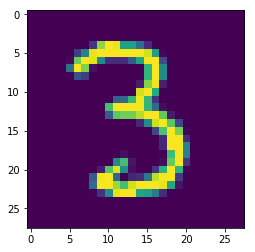

In [56]:
"""
author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from random import randint
from utils import reglog


w = logreg.coef_
x = X_37[randint(0, len(X_37) - 1)]

# Figure
fig = plt.figure()
    
# Initialisation
image = plt.imshow(x.reshape(28,28), animated = True)

# Fonction d'animation, elle est appelée séquentiellement en changeant le alpha.
def animate(alpha):
    
    x_mod = reglog(x, w.T, alpha)
    image.set_array(x_mod)
    
    return image

# Retourne l'animation.  
# blit=True pour ne mettre à jour que les parties qui changent.
anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 0.1, blit = False)


# Stocke l'animation en extension mp4.  
# Nécessite ffmpeg ou mencoder
# Pour plus d'informations : http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('animation.mp4', writer = "ffmpeg", fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [57]:
from IPython.display import HTML

HTML("""<video width = "50%" controls> <source src = "animation.mp4">""")

Cette vidéo représente donc notre simulation en fonction de la valeur de $\alpha$. Nous pouvons observer que l'image se pixelise de plus en plus, jusqu'à ce qu'elle perd sa forme initiale. 

#### Question 6
Décrivons mathématiquement ce que paramétrise le paramètre $\alpha > 0$.

En utilisant le *widget*, nous observons que notre image change de forme, lorsque $\alpha$ varie. Celle-ci se pixelise, jusqu'à ce qu'elle devient incomprehensible et on n'arrive plus à distinguer la chiffre qui s'y trouve. Plus $\alpha$ est proche de 0, plus l'image devient claire.

D'un autre côté, en regardant la formule, on voit que le seul paramètre qui change c'est bien $\alpha$. Les autres paramètres sont constants. 

Donc nous pouvons associer $\alpha > 0$ au learning-rate, tout comme dans la descente de gradient.

#### Question 7
Proposons une analyse en composante principale (: Principal Component Analysis (PCA)) sur la matrice X_37, pour visualiser la base de données dans un espace de dimension 2, en ajustant les couleurs selon la classe des données. 

On s'est inspiré de l'exemple : https://scikitlearn.org/stable/auto_examples/decomposition/plot_incremental_pca.html#sphx-glrauto-examples-decomposition-plot-incremental-pca-py (les informations importantes sont rajoutées dans le docstring).


author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD



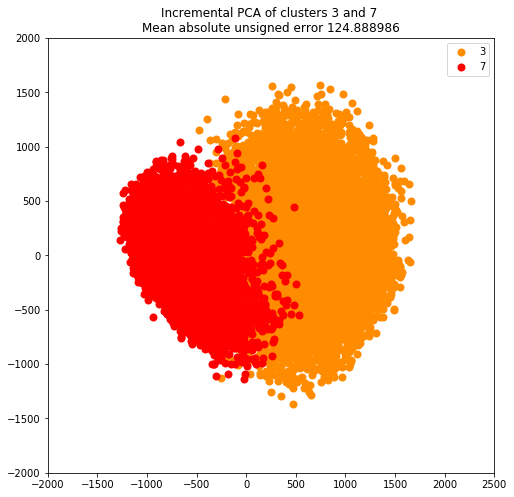

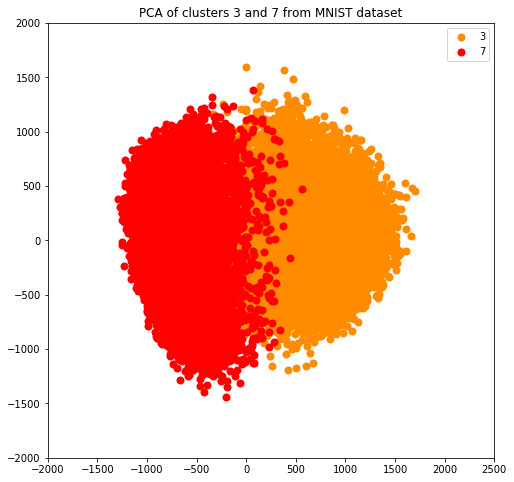

In [58]:
print(__doc__)

"""
Authors: Kyle Kastner
License: BSD 3 clause
"""

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, IncrementalPCA

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X_37)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_37)

colors = ['darkorange','red']
ylabel = np.array(['3','7'])
index = list([3,7])

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, index,  ylabel):
        plt.scatter(X_transformed[y_37 == i, 0], X_transformed[y_37 == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of clusters 3 and 7 \nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of clusters 3 and 7 from MNIST dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-2000, 2500, -2000, 2000])

plt.show()

On observe d'après l'ACP que les deux classes, 3 (représentées en orange) et 7 (représentées en rouge), sont bien distinctes.